# Model Building

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc # garbage collector
from scipy.stats import norm

# Visualization
import seaborn as sns
color = sns.color_palette()
sns.set(style="darkgrid")

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 50

In [2]:
# check files
from subprocess import check_output
print(check_output(["ls", "../input/input/"]).decode("utf8"))

land_test.csv
land_train.csv



In [3]:
# Load Data
print("Loading data...")
train = pd.read_csv('../input/input/land_train.csv')
print("Train rows and columns", train.shape)
test = pd.read_csv('../input/input/land_test.csv')
print("Train rows and columns", test.shape)

Loading data...
Train rows and columns (110000, 13)
Train rows and columns (2000000, 12)


## 1.  Remove Outliers 

In [4]:
def TurkyOutliers(df_out,nameOfFeature,drop=False):

    valueOfFeature = df_out[nameOfFeature]
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(valueOfFeature, 25.)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(valueOfFeature, 75.)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    # print "Outlier step:", step
    outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()
    feature_outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].values
    # df[~((df[nameOfFeature] >= Q1 - step) & (df[nameOfFeature] <= Q3 + step))]


    # Remove the outliers, if any were specified
    print ("Number of outliers (inc duplicates): {} and outliers: {}".format(len(outliers), feature_outliers))
    if drop:
        good_data = df_out.drop(df_out.index[outliers]).reset_index(drop = True)
        print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))
        return good_data
    else: 
        print ("Nothing happens, df.shape = ",df_out.shape)
        return df_out

In [5]:
# Remove Outliers from each columns

df_clean = TurkyOutliers(train,'X1',True)
df_clean = TurkyOutliers(train,'X2',True)
df_clean = TurkyOutliers(train,'X3',True)
df_clean = TurkyOutliers(train,'X4',True)
df_clean = TurkyOutliers(train,'X5',True)
df_clean = TurkyOutliers(train,'X6',True)

Number of outliers (inc duplicates): 1355 and outliers: [7873 9346 9161 ... 1710 1836 1686]
New dataset with removed outliers has 108645 samples with 13 features each.
Number of outliers (inc duplicates): 2096 and outliers: [7894 9615 9380 ... 2089 2061 2079]
New dataset with removed outliers has 107904 samples with 13 features each.
Number of outliers (inc duplicates): 1944 and outliers: [8051 9877 9634 ... 3243 3403 3307]
New dataset with removed outliers has 108056 samples with 13 features each.
Number of outliers (inc duplicates): 2054 and outliers: [4056 4130 3971 ... 3907 4028 3949]
New dataset with removed outliers has 107946 samples with 13 features each.
Number of outliers (inc duplicates): 2128 and outliers: [3693 3660 4013 ... 4110 3861 3689]
New dataset with removed outliers has 107872 samples with 13 features each.
Number of outliers (inc duplicates): 2576 and outliers: [3186 3015 2990 ... 2848 2901 2828]
New dataset with removed outliers has 107424 samples with 13 feature

In [6]:
# Remove Outliers from each columns

df_clean_test = TurkyOutliers(test,'X1',True)
df_clean_test = TurkyOutliers(test,'X2',True)
df_clean_test = TurkyOutliers(test,'X3',True)
df_clean_test = TurkyOutliers(test,'X4',True)
df_clean_test = TurkyOutliers(test,'X5',True)
df_clean_test = TurkyOutliers(test,'X6',True)

Number of outliers (inc duplicates): 23242 and outliers: [ 842  821 1192 ...  918 1185  817]
New dataset with removed outliers has 1976758 samples with 12 features each.
Number of outliers (inc duplicates): 28177 and outliers: [1050 1050 1416 ... 1051 1459 1093]
New dataset with removed outliers has 1971823 samples with 12 features each.
Number of outliers (inc duplicates): 12712 and outliers: [1555 1623 1470 ... 1479 1771 1486]
New dataset with removed outliers has 1987288 samples with 12 features each.
Number of outliers (inc duplicates): 30881 and outliers: [2835  752 2882 ... 2828  613 2911]
New dataset with removed outliers has 1969119 samples with 12 features each.
Number of outliers (inc duplicates): 25467 and outliers: [3236 3599 3315 ... 3399 3342 3127]
New dataset with removed outliers has 1974533 samples with 12 features each.
Number of outliers (inc duplicates): 6036 and outliers: [2515 2594 2670 ... 3686 2704 4463]
New dataset with removed outliers has 1993964 samples with

Note : Removing outliers is not always a good idea. Depending on the problem - you treat outliers. We can leave the outliers but we would be limited to algorithms that are robust to outliers.

## 2. Remove Correlated Features

In [7]:
# Create correlation matrix
corr_matrix = df_clean.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]
to_drop

['X2', 'X3', 'I3', 'I4']

In [8]:
# saving the labels
y = train['target']

In [9]:
# dropping the correlated features

test = test.drop(columns = to_drop)
to_drop.append('target')
train = train.drop(columns = to_drop)

## 3. Scaling Features

In [10]:
from sklearn.preprocessing import StandardScaler
# Create a minimum and maximum processor object
scaler = StandardScaler()

# Create an object to transform the data to fit minmax processor
train_df = scaler.fit_transform(train)

In [11]:
test_df = scaler.transform(test)

In [12]:
# Run the normalizer on the dataframe
train_df = pd.DataFrame(train_df,columns=['X1','X4','X5','X6','I1','I2','I5','I6'])
# Run the normalizer on the dataframe
test_df = pd.DataFrame(test_df,columns=['X1','X4','X5','X6','I1','I2','I5','I6'])

## 4. Model Building

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score

# Model imports
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

# Custom scorer for cross validation
scorer = make_scorer(f1_score, greater_is_better=True, average = 'micro')

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



In [14]:
features = list(train_df.columns)

### 4.1 Random Forest Model

In [15]:
%%time
model = RandomForestClassifier(n_estimators=100, random_state=10, 
                               n_jobs = -1)
# 10 fold cross validation
cv_score = cross_val_score(model, train_df, y, cv = 5, scoring = scorer)

print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

10 Fold Cross Validation F1 Score = 0.8832 with std = 0.0836
CPU times: user 1min 30s, sys: 1.11 s, total: 1min 31s
Wall time: 24.3 s


In [16]:
model.fit(train_df, y)

# Feature importances into a dataframe
feature_importances = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importances

,feature,importance
0,X1,0.090836
1,X4,0.070313
2,X5,0.106088
3,X6,0.076087
4,I1,0.236286
5,I2,0.206989
6,I5,0.144088
7,I6,0.069314


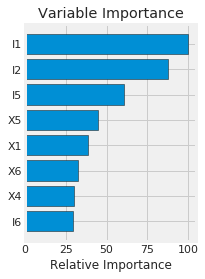

In [17]:
# Plot feature importance
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_df.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [18]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

# Filter out warnings from models
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)

# Dataframe to hold results
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""
    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring=scorer, n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

### 4.2 Linear Support Vector Classifier

In [19]:
model_results = cv_model(train_df, y, LinearSVC(), 
                         'LSVC', model_results)

10 Fold CV Score: 0.90698 with std: 0.02814


### 4.3 Gaussian Naive Bayes

In [20]:
model_results = cv_model(train_df, y, 
                         GaussianNB(), 'GNB', model_results)

10 Fold CV Score: 0.87895 with std: 0.05759


### 4.4 Linear Discriminant Analysis

In [21]:
model_results = cv_model(train_df, y, 
                          LinearDiscriminantAnalysis(), 
                          'LDA', model_results)

10 Fold CV Score: 0.90556 with std: 0.04256


### 4.5 K Nearest Neighbour

In [22]:
for n in [5, 10, 20]:
    print(f'\nKNN with {n} neighbors\n')
    model_results = cv_model(train_df, y, 
                             KNeighborsClassifier(n_neighbors = n),
                             f'knn-{n}', model_results)


KNN with 5 neighbors

10 Fold CV Score: 0.954 with std: 0.01401

KNN with 10 neighbors

10 Fold CV Score: 0.95383 with std: 0.01594

KNN with 20 neighbors

10 Fold CV Score: 0.9524 with std: 0.01623


### 4.6 Extra Trees Classifier

In [23]:
from sklearn.ensemble import ExtraTreesClassifier

model_results = cv_model(train_df, y, 
                         ExtraTreesClassifier(n_estimators = 100, random_state = 10),
                         'EXT', model_results)

10 Fold CV Score: 0.95675 with std: 0.01263


### 4.7 Random Forest Classifier

In [24]:
model_results = cv_model(train_df, y,
                          RandomForestClassifier(150, random_state=10),
                              'RF', model_results)

10 Fold CV Score: 0.95644 with std: 0.01341


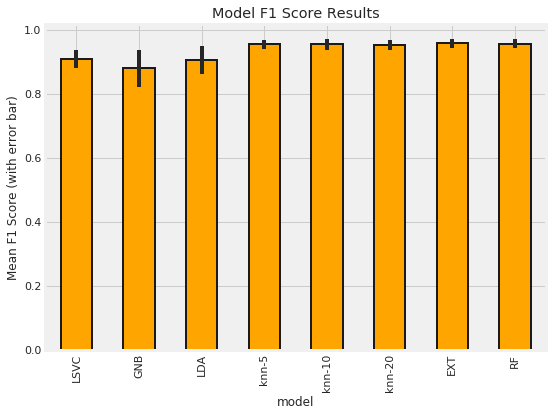

In [25]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                 edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

In [26]:
model_results

,model,cv_mean,cv_std
0,LSVC,0.906982,0.028142
1,GNB,0.878955,0.057588
2,LDA,0.905564,0.042563
3,knn-5,0.954000,0.014009
4,knn-10,0.953827,0.015940
5,knn-20,0.952400,0.016229
6,EXT,0.956755,0.012635
7,RF,0.956436,0.013407


In [27]:
clf = RandomForestClassifier(100, random_state = 10)
clf.fit(train_df,y) # Its always a good idea to use the whole training set.

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [28]:
# Predict of test data
predict = clf.predict(test_df) 

In [29]:
test_df['target'] = predict

In [30]:
test_df.head()

,X1,X4,X5,X6,I1,I2,I5,I6,target
0,-0.391788,-0.213161,0.775717,0.715794,0.025154,0.766960,0.833832,-1.389488,4
1,0.376284,0.117010,1.012815,1.146127,-0.438413,1.123364,0.500127,-1.348127,3
2,-0.599564,-0.169907,0.276199,-0.004354,0.570772,0.000345,0.807070,-0.825746,1
3,-0.921735,0.128544,-0.385604,-0.516236,0.910357,-0.949793,0.302415,0.359633,1
4,-0.366108,-0.315529,0.536317,0.313063,0.066675,0.647228,0.615559,-1.238273,3


In [31]:
# Create the output file
# Naming the output file as model number - model used - estimators

test_df.to_csv("01-rf_100.csv")

In [32]:
# ! pip freeze > requirements.txt # To generate requirements file for reproducibility.


**Conclusion:**

* We achieved micro F1-score of 0.956 using random forest model. For more details check the brief documentation in socialcops/docs folder.
* Tree based models are more suitable for this problem.